# Question 4 - Can you detect cascading failures as delays in one airport create delays in others?

## Importing Packages

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
# Importing the main cleaned dataset
cleaned_df = pd.read_csv("Files/Cleaned_Dataset.csv")

In [3]:
# Changing the setting to show all columns and showing first and last 5 rows pf the main dataset
pd.set_option("display.max_columns", None)
cleaned_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268890,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,0,0
14268891,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,0,0
14268892,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,0,0,15,0,0
14268893,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,0,0,36


##### Using the "CRSDepTime", "DayofMonth", "Month" and "Year" columns, a new column is created to givee the scheduled  departure time of each flight in datetime format

In [4]:
# Selecting the first 2 numbers gives the minute part of the CRSDepTime
CRSDepTime_Minutes = cleaned_df.CRSDepTime.astype(str).str[-2:]
CRSDepTime_Minutes

0           45
1           53
2           15
3           55
4           32
            ..
14268890    05
14268891    51
14268892    25
14268893    15
14268894    00
Name: CRSDepTime, Length: 14268895, dtype: object

In [5]:
# Selecting the last 2 numbers gives the hour part of the CRSDepTime
CRSDepTime_Hours = cleaned_df.CRSDepTime.astype(str).str[:-2]
CRSDepTime_Hours

0            7
1           10
2           19
3           17
4            8
            ..
14268890    16
14268891    18
14268892    10
14268893    13
14268894    18
Name: CRSDepTime, Length: 14268895, dtype: object

##### There will be entries where CRSDepTime_Hours will be empty, for example 30 which indicates 00:30 am, will not have an hour value. Therefore all such empty entries will be replaced with 0 to avoid arrors.

In [6]:
# Replacing empty values with 0
CRSDepTime_Hours[CRSDepTime_Hours == ""] = "0"

In [7]:
# Getting Day of the month 
Days = cleaned_df.DayofMonth.astype(str)

In [8]:
# Applying a lambda to function to go iterate through each row and add a 0 to the start if there are less -
# - 2 characters
Days = Days.apply(lambda x: '{0:0>2}'.format(x)) 

##### For example, if the  "Days" column contained the values "1", "2", "4", "10", "12", applying the lambda function would produce the formatted string values "01", "02", "04", "10", "12"

In [9]:
# Creating the new column with CRSDepTime in datetime format
cleaned_df["DateTimeCRSDepTime"] = pd.to_datetime(
            Days.astype(str) + "/" + cleaned_df.Month.astype(str) + "/" + cleaned_df.Year.astype(str) + "," + CRSDepTime_Hours + ":" + CRSDepTime_Minutes, 
            format='%d/%m/%Y,%H:%M')
cleaned_df["DateTimeCRSDepTime"]

0          2006-01-11 07:45:00
1          2006-01-11 10:53:00
2          2006-01-11 19:15:00
3          2006-01-11 17:55:00
4          2006-01-11 08:32:00
                   ...        
14268890   2007-12-15 16:05:00
14268891   2007-12-15 18:51:00
14268892   2007-12-15 10:25:00
14268893   2007-12-15 13:15:00
14268894   2007-12-15 18:00:00
Name: DateTimeCRSDepTime, Length: 14268895, dtype: datetime64[ns]

In [10]:
# Creating new column "Total_Delay" that adds up the arrival delay and departure delay
cleaned_df["TotalDelay"] = cleaned_df["ArrDelay"] + cleaned_df["DepDelay"]
cleaned_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DateTimeCRSDepTime,TotalDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0,2006-01-11 07:45:00,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0,2006-01-11 10:53:00,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0,2006-01-11 19:15:00,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0,2006-01-11 17:55:00,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0,2006-01-11 08:32:00,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268890,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,0,0,2007-12-15 16:05:00,6.0
14268891,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,0,0,2007-12-15 18:51:00,16.0
14268892,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,0,0,15,0,0,2007-12-15 10:25:00,14.0
14268893,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,0,0,36,2007-12-15 13:15:00,74.0


In [11]:
# Sorting the flights by "DateTimeCRSDepTime"
cleaned_df = cleaned_df.sort_values(by = ["DateTimeCRSDepTime"])
cleaned_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DateTimeCRSDepTime,TotalDelay
387002,2006,1,1,7,2357.0,5,655.0,731,NW,336,N371NW,238.0,266.0,218.0,-36.0,-8.0,LAX,DTW,1979,8,12,0,0,0,0,0,0,0,2006-01-01 00:05:00,-44.0
480560,2006,1,1,7,3.0,15,559.0,612,AS,852,N645AS,296.0,297.0,282.0,-13.0,-12.0,ANC,LAS,2304,6,8,0,0,0,0,0,0,0,2006-01-01 00:15:00,-25.0
528515,2006,1,1,7,10.0,15,641.0,653,DL,714,N678DL,211.0,218.0,189.0,-12.0,-5.0,LAS,ATL,1747,8,14,0,0,0,0,0,0,0,2006-01-01 00:15:00,-17.0
493038,2006,1,1,7,40.0,20,828.0,835,B6,484,N509JB,288.0,315.0,441.0,-7.0,20.0,LAS,BOS,2381,17,10,0,0,0,0,0,0,0,2006-01-01 00:20:00,13.0
478074,2006,1,1,7,26.0,30,502.0,517,AA,2404,N3APAA,156.0,167.0,136.0,-15.0,-4.0,LAX,DFW,1235,4,16,0,0,0,0,0,0,0,2006-01-01 00:30:00,-19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13967528,2007,12,31,1,2352.0,2359,129.0,136,US,387,N834AW,97.0,97.0,69.0,-7.0,-7.0,LAS,SMF,397,10,18,0,0,0,0,0,0,0,2007-12-31 23:59:00,-14.0
13993539,2007,12,31,1,4.0,2359,620.0,616,DL,1664,N67171,256.0,257.0,227.0,4.0,5.0,SLC,JFK,1989,9,20,0,0,0,0,0,0,0,2007-12-31 23:59:00,9.0
13967503,2007,12,31,1,49.0,2359,246.0,220,US,568,N672AW,57.0,81.0,37.0,26.0,50.0,LAS,PHX,256,6,14,0,0,26,0,0,0,0,2007-12-31 23:59:00,76.0
13928779,2007,12,31,1,2358.0,2359,405.0,414,UA,1588,N471UA,187.0,195.0,169.0,-9.0,-1.0,PHX,ORD,1440,7,11,0,0,0,0,0,0,0,2007-12-31 23:59:00,-10.0


##### Shifting the values in each group down by one position, so that each row has the "TotalDelay" value of the previous row

In [12]:
# Creating a new column called "PreviousDelay"
cleaned_df["PreviousDelay"] = cleaned_df.groupby("TailNum")["TotalDelay"].shift(periods=1)
cleaned_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DateTimeCRSDepTime,TotalDelay,PreviousDelay
387002,2006,1,1,7,2357.0,5,655.0,731,NW,336,N371NW,238.0,266.0,218.0,-36.0,-8.0,LAX,DTW,1979,8,12,0,0,0,0,0,0,0,2006-01-01 00:05:00,-44.0,NaN
480560,2006,1,1,7,3.0,15,559.0,612,AS,852,N645AS,296.0,297.0,282.0,-13.0,-12.0,ANC,LAS,2304,6,8,0,0,0,0,0,0,0,2006-01-01 00:15:00,-25.0,NaN
528515,2006,1,1,7,10.0,15,641.0,653,DL,714,N678DL,211.0,218.0,189.0,-12.0,-5.0,LAS,ATL,1747,8,14,0,0,0,0,0,0,0,2006-01-01 00:15:00,-17.0,NaN
493038,2006,1,1,7,40.0,20,828.0,835,B6,484,N509JB,288.0,315.0,441.0,-7.0,20.0,LAS,BOS,2381,17,10,0,0,0,0,0,0,0,2006-01-01 00:20:00,13.0,NaN
478074,2006,1,1,7,26.0,30,502.0,517,AA,2404,N3APAA,156.0,167.0,136.0,-15.0,-4.0,LAX,DFW,1235,4,16,0,0,0,0,0,0,0,2006-01-01 00:30:00,-19.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13967528,2007,12,31,1,2352.0,2359,129.0,136,US,387,N834AW,97.0,97.0,69.0,-7.0,-7.0,LAS,SMF,397,10,18,0,0,0,0,0,0,0,2007-12-31 23:59:00,-14.0,-12.0
13993539,2007,12,31,1,4.0,2359,620.0,616,DL,1664,N67171,256.0,257.0,227.0,4.0,5.0,SLC,JFK,1989,9,20,0,0,0,0,0,0,0,2007-12-31 23:59:00,9.0,-22.0
13967503,2007,12,31,1,49.0,2359,246.0,220,US,568,N672AW,57.0,81.0,37.0,26.0,50.0,LAS,PHX,256,6,14,0,0,26,0,0,0,0,2007-12-31 23:59:00,76.0,-44.0
13928779,2007,12,31,1,2358.0,2359,405.0,414,UA,1588,N471UA,187.0,195.0,169.0,-9.0,-1.0,PHX,ORD,1440,7,11,0,0,0,0,0,0,0,2007-12-31 23:59:00,-10.0,5.0


##### It allows for the  comparison between the delay of a particular flight which is taken from "TotalDelay" with the delay of the previous flight for the same aircraft which is taken from "PreviousDelay".
##### Then the effect the previous delay of the flight has on the Total Delay of its' next one can be observed.

In [13]:
# Checking for any null values
cleaned_df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
Diverted                 0
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
DateTimeCRSDepTime       0
TotalDelay               0
PreviousDelay         5811
dtype: int64

### There are multiple reasons for the existence of null values
##### 1. If a plane has had only 1 recorded flight it will not have a "PreviousDelay"
##### 2. The first flight for any individual plane will also not have any "PreviousDelay"

In [14]:
# Dropping null values and checking if they have been removed
cleaned_df = cleaned_df.dropna(axis = 0)
cleaned_df.isnull().sum()

Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
DepTime               0
CRSDepTime            0
ArrTime               0
CRSArrTime            0
UniqueCarrier         0
FlightNum             0
TailNum               0
ActualElapsedTime     0
CRSElapsedTime        0
AirTime               0
ArrDelay              0
DepDelay              0
Origin                0
Dest                  0
Distance              0
TaxiIn                0
TaxiOut               0
Cancelled             0
Diverted              0
CarrierDelay          0
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
DateTimeCRSDepTime    0
TotalDelay            0
PreviousDelay         0
dtype: int64

## Plotting a scatter plot with a regression line to show how the delay of the previous flight affects the delay of the next flight

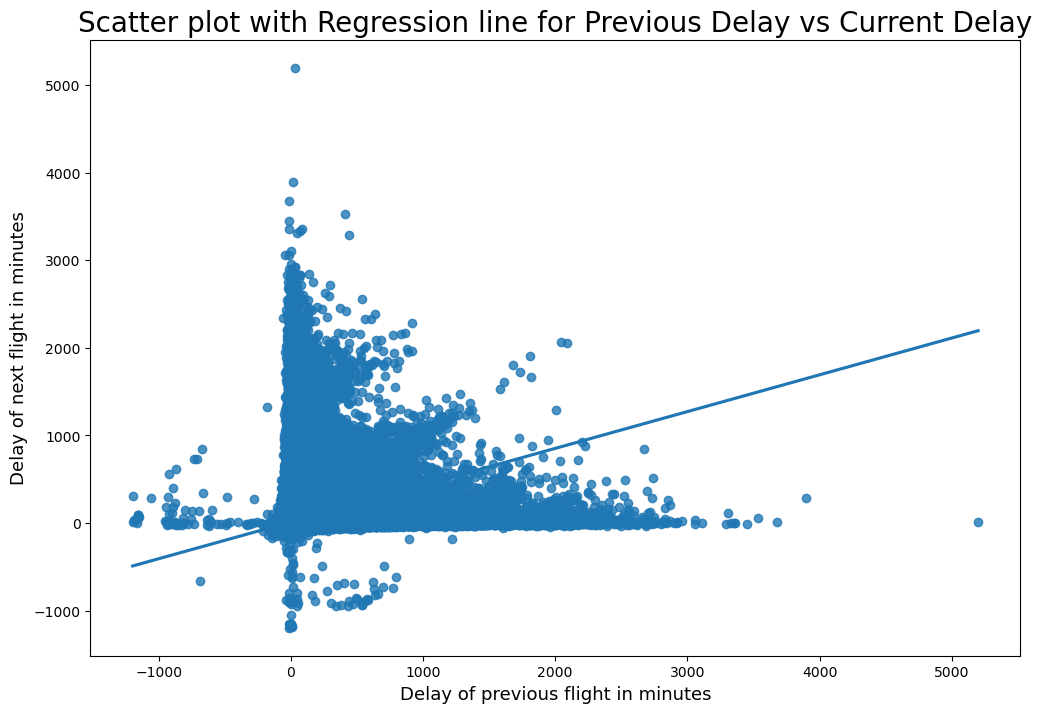

In [21]:
# Create a new figure and set the size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a scatter plot with a linear regression line
sns.regplot(x = "PreviousDelay", y = "TotalDelay", data = cleaned_df, scatter = True, ax = ax)

# Set the x-axis and y-axis labels and the title
ax.set_xlabel("Delay of previous flight in minutes", fontsize = 13)
ax.set_ylabel("Delay of next flight in minutes", fontsize = 13)
ax.set_title("Scatter plot with Regression line for Previous Delay vs Current Delay", fontsize = 20)

# Saving the plot locally as a ong
plt.savefig("Previos Delay vs Next Delay.png")

# Showing the plot
plt.show()

In [16]:
# Correlation between "TotalDelay" and "PreviousDelay"
correlationdata = cleaned_df[["TotalDelay", "PreviousDelay"]]
correlation = correlationdata.corr("pearson")
correlation

,TotalDelay,PreviousDelay
TotalDelay,1.000000,0.420088
PreviousDelay,0.420088,1.000000


## Getting a Contingency table for "PresenceOfCurrentDelay" vs "PresenceOfCurrentDelay"

In [17]:
# Creating a new column "PresenceOfCurrentDelay", if the "TotalDelay" is greater than 0 "Present" is entered and if not "Absent" 
cleaned_df["PresenceOfCurrentDelay"] = cleaned_df["TotalDelay"].apply(lambda x: "Present" if x>0 else "Absent")
# Creating a new column "PresenceOfPreviousDelay", if the "PreviosDelay" is greater than 0 "Present" is entered and if not "Absent"
cleaned_df["PresenceOfPreviousDelay"] = cleaned_df["PreviousDelay"].apply(lambda x: "Present" if x>0 else "Absent")
cleaned_df

C:\Users\asd27\AppData\Local\Temp\ipykernel_12892\1607780541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["PresenceOfCurrentDelay"] = cleaned_df["TotalDelay"].apply(lambda x: "Present" if x>0 else "Absent")
C:\Users\asd27\AppData\Local\Temp\ipykernel_12892\1607780541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["PresenceOfPreviousDelay"] = cleaned_df["PreviousDelay"].apply(lambda x: "Present" if x>0 else "Absent")


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DateTimeCRSDepTime,TotalDelay,PreviousDelay,PresenceOfCurrentDelay,PresenceOfPreviousDelay
480673,2006,1,1,7,746.0,600,959.0,849,AS,81,N708AS,193.0,229.0,178.0,70.0,106.0,SEA,ANC,1449,4,11,0,0,70,0,0,0,0,2006-01-01 06:00:00,176.0,-10.0,Present,Absent
253407,2006,1,1,7,601.0,600,854.0,833,UA,748,N852UA,173.0,153.0,127.0,21.0,1.0,SEA,LAX,954,31,15,0,0,0,0,21,0,0,2006-01-01 06:00:00,22.0,-12.0,Present,Absent
154263,2006,1,1,7,614.0,615,653.0,700,OO,6160,N233SW,39.0,45.0,27.0,-7.0,-1.0,LAX,SAN,109,3,9,0,0,0,0,0,0,0,2006-01-01 06:15:00,-8.0,-11.0,Absent,Absent
522597,2006,1,1,7,719.0,620,1330.0,1220,CO,223,N75853,251.0,240.0,222.0,70.0,59.0,SEA,IAH,1874,13,16,0,0,59,0,11,0,0,2006-01-01 06:20:00,129.0,-20.0,Present,Absent
154388,2006,1,1,7,623.0,625,704.0,706,OO,6260,N212SW,41.0,41.0,25.0,-2.0,-2.0,SFO,SMF,86,6,10,0,0,0,0,0,0,0,2006-01-01 06:25:00,-4.0,-4.0,Absent,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13967528,2007,12,31,1,2352.0,2359,129.0,136,US,387,N834AW,97.0,97.0,69.0,-7.0,-7.0,LAS,SMF,397,10,18,0,0,0,0,0,0,0,2007-12-31 23:59:00,-14.0,-12.0,Absent,Absent
13993539,2007,12,31,1,4.0,2359,620.0,616,DL,1664,N67171,256.0,257.0,227.0,4.0,5.0,SLC,JFK,1989,9,20,0,0,0,0,0,0,0,2007-12-31 23:59:00,9.0,-22.0,Present,Absent
13967503,2007,12,31,1,49.0,2359,246.0,220,US,568,N672AW,57.0,81.0,37.0,26.0,50.0,LAS,PHX,256,6,14,0,0,26,0,0,0,0,2007-12-31 23:59:00,76.0,-44.0,Present,Absent
13928779,2007,12,31,1,2358.0,2359,405.0,414,UA,1588,N471UA,187.0,195.0,169.0,-9.0,-1.0,PHX,ORD,1440,7,11,0,0,0,0,0,0,0,2007-12-31 23:59:00,-10.0,5.0,Absent,Present


In [18]:
# Contingency table
crosstab = pd.crosstab(cleaned_df["PresenceOfPreviousDelay"], cleaned_df["PresenceOfCurrentDelay"], rownames = ["PresenceOfPreviousDelay"], colnames = ["PresenceOfCurrentDelay"])
crosstab

PresenceOfCurrentDelay,Absent,Present
PresenceOfPreviousDelay,,
Absent,5221695,2389289
Present,2388699,4263401


In [19]:
# Getting the total across the rows
row_sum = crosstab.sum(axis=1)
row_sum

PresenceOfPreviousDelay
Absent     7610984
Present    6652100
dtype: int64

In [20]:
# Dividing the values in "crosstab" by the row total and multiplying by 100 to get it as percentages
crosstab_percent = crosstab.divide(row_sum, axis=0)*100 
crosstab_percent

PresenceOfCurrentDelay,Absent,Present
PresenceOfPreviousDelay,,
Absent,68.607357,31.392643
Present,35.908946,64.091054
